# Part 1 - Slides Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Create dataset as a Series
ds1 = pd.Series([65,65,70,75,80,81,85,90,95,100])
ds2 = pd.Series([35,35,37,40,43,56,57,58,60])
ds3 = pd.Series([21, 22, 24, 25, 29, 37, 49])

data = ds3

In [2]:
# Full descriptive summary
summary = data.describe()
print("\nDescribe():\n", summary)


Describe():
 count     7.000000
mean     29.571429
std      10.130106
min      21.000000
25%      23.000000
50%      25.000000
75%      33.000000
max      49.000000
dtype: float64


In [3]:
# Measures of Central Tendency
mean = data.mean()
median = data.median()
mode = data.mode()   # can be multiple modes
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 29.571428571428573
Median: 25.0
Mode: 0    21
1    22
2    24
3    25
4    29
5    37
6    49
dtype: int64


In [4]:
# Measures of spread
variance = data.var()
std_dev = data.std()
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Variance: 102.61904761904763
Standard Deviation: 10.130106002359879


In [5]:
# Quartiles using quantile()
Q1 = data.quantile(0.25)
Q2 = data.quantile(0.50)  # median
Q3 = data.quantile(0.75)

print("Q1:", Q1)
print("Q2 (Median):", Q2)
print("Q3:", Q3)

Q1: 23.0
Q2 (Median): 25.0
Q3: 33.0


In [6]:
print("="*60)
print("IQR, FENCES, OUTLIERS")
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = data[(data < lower_fence) | (data > upper_fence)]

print("IQR:", IQR)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)
print("Outliers:", outliers.tolist() if not outliers.empty else "None")

IQR, FENCES, OUTLIERS
IQR: 10.0
Lower fence: 8.0
Upper fence: 48.0
Outliers: [49]


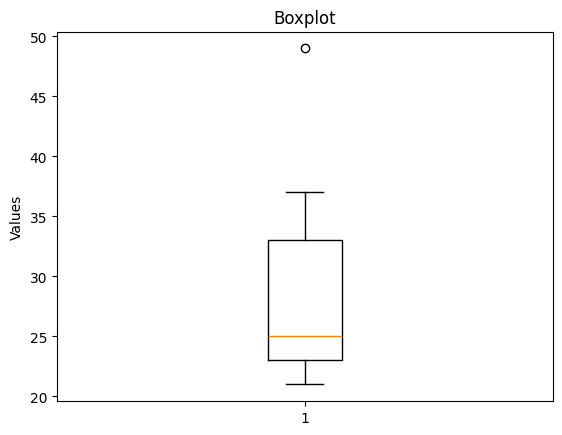

In [7]:

# Create boxplot with Tukey method (IQR, whis=1.5)
plt.boxplot(data) # matplotlib.pyplot.boxplot uses the Tukey method by default.
plt.title("Boxplot")
plt.ylabel("Values")
plt.show()

# Part 2 - Temperature data

In [8]:
# --- Data ---
tempMin = pd.Series([50.7, 52.8, 48.6, 53.0, 49.9, 47.9, 54.1, 47.6, 43.6, 45.5])
tempMax = pd.Series([59.5, 55.7, 57.3, 71.5, 69.8, 68.8, 67.5, 66.0, 66.1, 61.7])

# --- Means ---
print("Mean tempMin:", tempMin.mean())
print("Mean tempMax:", tempMax.mean())

# --- Medians ---
print("Median tempMin:", tempMin.median())
print("Median tempMax:", tempMax.median())

# --- Standard deviations ---
print("SD tempMin:", tempMin.std())
print("SD tempMax:", tempMax.std())

# --- Summaries ---
print("\nSummary tempMin:\n", tempMin.describe())
print("\nSummary tempMax:\n", tempMax.describe())

Mean tempMin: 49.370000000000005
Mean tempMax: 64.39000000000001
Median tempMin: 49.25
Median tempMax: 66.05
SD tempMin: 3.3915090053445724
SD tempMax: 5.491296143291976

Summary tempMin:
 count    10.000000
mean     49.370000
std       3.391509
min      43.600000
25%      47.675000
50%      49.250000
75%      52.275000
max      54.100000
dtype: float64

Summary tempMax:
 count    10.000000
mean     64.390000
std       5.491296
min      55.700000
25%      60.050000
50%      66.050000
75%      68.475000
max      71.500000
dtype: float64


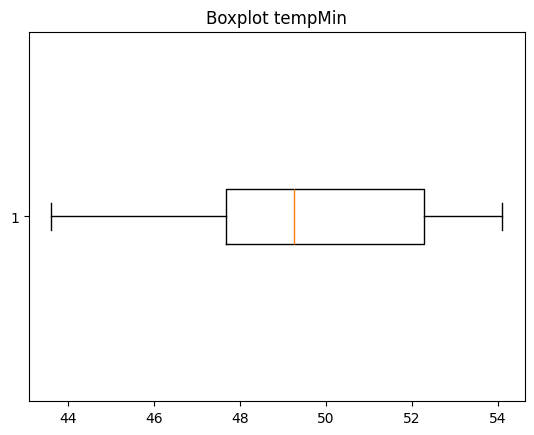

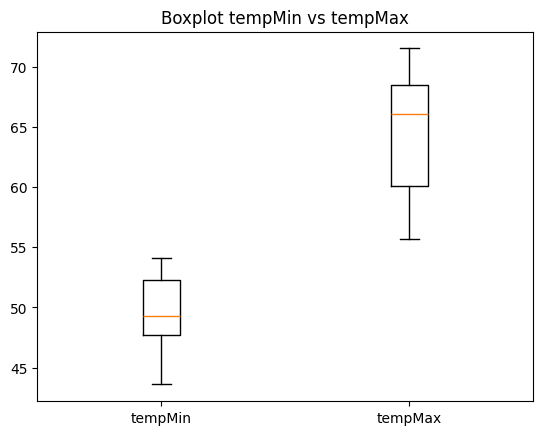

In [9]:
# --- Boxplots ---
plt.boxplot(tempMin, vert=False)
plt.title("Boxplot tempMin")
plt.show()

plt.boxplot([tempMin, tempMax], tick_labels=["tempMin", "tempMax"])
plt.title("Boxplot tempMin vs tempMax")
plt.show()

IQR: 4.600000000000001
Lower Fence: 40.77499999999999
Upper Fence: 59.175
Count below lowerFence: 0
Count above upperFence: 0

New Summary tempMin:
 count    11.000000
mean     50.790909
std       5.706217
min      43.600000
25%      47.750000
50%      49.900000
75%      52.900000
max      65.000000
dtype: float64


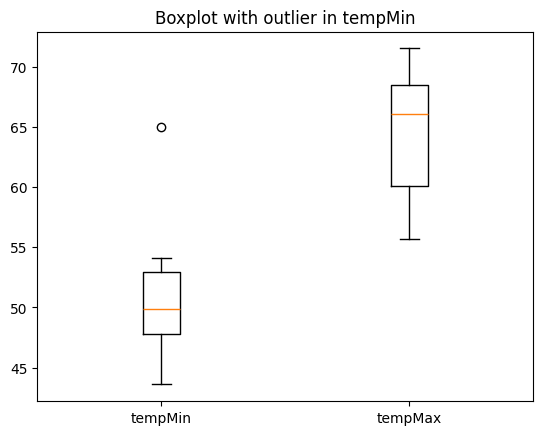

New Lower Fence: 40.025000000000006
New Upper Fence: 60.625
Count below lowerFence: 0
Count above upperFence: 1
Outliers: [65.]
Variance tempMin: 32.56090909090909
SD via sqrt(var): 5.706216705568506
SD directly via pandas: 5.706216705568506


In [10]:
# --- IQR, fences, outliers for tempMin ---
q1, q3 = tempMin.quantile(0.25), tempMin.quantile(0.75)
iqr = q3 - q1
lowerFence = q1 - 1.5 * iqr
upperFence = q3 + 1.5 * iqr

print("IQR:", iqr)
print("Lower Fence:", lowerFence)
print("Upper Fence:", upperFence)
print("Count below lowerFence:", (tempMin < lowerFence).sum())
print("Count above upperFence:", (tempMin > upperFence).sum())

# --- Addin an outlier, value 65 to tempMin ---
tempMin = pd.Series([50.7, 52.8, 48.6, 53.0, 49.9, 47.9, 54.1, 47.6, 43.6, 45.5, 65])

print("\nNew Summary tempMin:\n", tempMin.describe())

plt.boxplot([tempMin, tempMax], tick_labels=["tempMin", "tempMax"])
plt.title("Boxplot with outlier in tempMin")
plt.show()

# --- New IQR & fences after adding 65 ---
q1, q3 = tempMin.quantile(0.25), tempMin.quantile(0.75)
iqr = q3 - q1
lowerFence = q1 - 1.5 * iqr
upperFence = q3 + 1.5 * iqr

print("New Lower Fence:", lowerFence)
print("New Upper Fence:", upperFence)
print("Count below lowerFence:", (tempMin < lowerFence).sum())
print("Count above upperFence:", (tempMin > upperFence).sum())
print("Outliers:", tempMin[tempMin > upperFence].values)

# --- Variance and SD manually ---
print("Variance tempMin:", tempMin.var())
print("SD via sqrt(var):", math.sqrt(tempMin.var()))
print("SD directly via pandas:", tempMin.std())

# Part 3 intake dataset

    pre  post
1  5260  3910
2  5470  4220
3  5640  3885
4  6180  5160
5  6390  5645


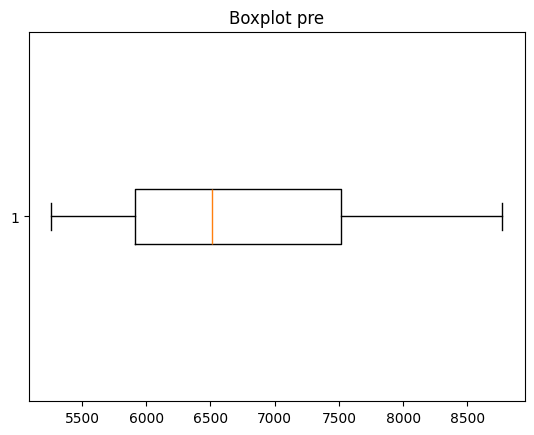

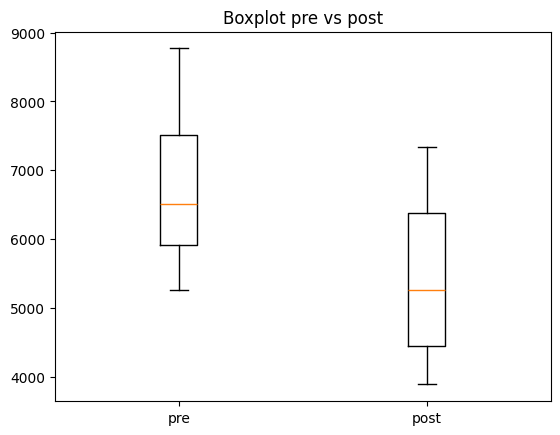

In [11]:
# --- Load intake dataset ---
intake = pd.read_csv("https://raw.githubusercontent.com/hogeschool/CMIBOD021T-2526/refs/heads/main/data/iswr/intake.csv")
print(intake.head())

# --- Boxplots for intake ---
plt.boxplot(intake["pre"], vert=False)
plt.title("Boxplot pre")
plt.show()

plt.boxplot([intake["pre"], intake["post"]], tick_labels=["pre", "post"])
plt.title("Boxplot pre vs post")
plt.show()

In [20]:
# --- Load energy dataset ---
energy = pd.read_csv("https://raw.githubusercontent.com/hogeschool/CMIBOD021T-2526/refs/heads/main/data/iswr/energy.csv")
print(energy.head())

# --- Select lean and obese expenditures ---
# Subset: Series
expendLean = energy["expend"] > 8

     "expend"   "stature"
1        9.21     "obese"
2        7.53      "lean"
3        7.48      "lean"
4        8.08      "lean"
5        8.09      "lean"


KeyError: 'expend'

In [16]:
# --- Load energy dataset ---
energy = pd.read_csv("https://raw.githubusercontent.com/hogeschool/CMIBOD021T-2526/refs/heads/main/data/iswr/energy.csv")
print(energy.head())

# --- Select lean and obese expenditures ---
# Subset: Series
expendLean = energy.loc[energy["stature"] == "lean", "expend"]
expendObese = energy.loc[energy["stature"] == "obese", "expend"]

# --- Boxplot lean vs obese ---
plt.boxplot([expendLean, expendObese], tick_labels=["lean", "obese"])
plt.title("Boxplot expend by group")
plt.show()

# --- Equivalent to R: boxplot(expend ~ stature) ---
energy.boxplot(column="expend", by="stature")
plt.title("Boxplot expend ~ stature")
plt.suptitle("")  # remove automatic title
plt.show()

     "expend"   "stature"
1        9.21     "obese"
2        7.53      "lean"
3        7.48      "lean"
4        8.08      "lean"
5        8.09      "lean"


KeyError: 'stature'